##Mask-RCNN (MRCNN) Architecture Implementation for Instance Segmentation on teeth X-Ray Images

**Student Name**: Yassin Dinana

**Student ID**: 52094480

The first seven cells of the python notebook are to build the appropriate versions dependencies of MRCNN using Keras & Tensorflow to avoid getting dependencies errors

In [1]:
pip install mrcnn #Installing the MRCNN model in the notebook using the Python "Pip" command which is called later in the importation cell. 

     |████████████████████████████████| 51 kB 270 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54930 sha256=e7c3178e7218bc2cd35a4c8bfbc2602981fa429affbc27fa710184be4b61adf0
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [2]:
#Using the "Pip" command, the line belw is installing the h5py package which is ised to store a huge amount of numerical data. 
!pip3 install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 15.7 MB 180 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
tensorflow 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
google-co

In [3]:
#Installing an earlier version of TensorFlow to avoid dependencies errors
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [4]:
#Cloning the MRCNN model from a Github repository to our notebook. 
#Github repository: https://github.com/matterport/Mask_RCNN
!git clone https://github.com/matterport/Mask_RCNN
%cd Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 30.32 MiB/s, done.
Resolving deltas: 100% (562/562), done.
/content/Mask_RCNN


In [5]:
#Targeting and operning the model python file from the github repository. =
with open('mrcnn/model.py') as f:
    model_file = f.read()

with open('mrcnn/model.py', 'w') as f:
    model_file = model_file.replace("self.keras_model = self.build(mode=mode, config=config)",
                                    "self.keras_model = self.build(mode=mode, config=config)\n        self.keras_model.metrics_tensors = []")
    f.write(model_file)

In [6]:
#Installing the mentioned requirements in the repoistory to avoid dependencies errors and warnings. 
!pip3 install -r requirements.txt
!python3 setup.py install

     |████████████████████████████████| 199 kB 5.2 MB/s 
     |████████████████████████████████| 154 kB 43.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=fc4104526b42cb1dd4205fe06e3af8aa1bc956c194b906a16853c81c203d031d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'des

In [7]:
#Cloning the CoCo API from the repository to save the model weights when training. 
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 21.63 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/Mask_RCNN/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Mask_RCNN/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-LSlbJj/python3.7-3.

##Importing required libraries for Instance Segmentation

In [8]:
import os #For using operating system dependent functionalities
from os.path import join #Importing join from the os library to concatinate different paths of the dataset together. 
import sys #Helps manipulate the runtime environment. 
import random #Used to choose random batches from the dataset
import math #This library helps access mathematical functions to be used in the implementation. 
import numpy as np #NumPy library used for processing matrices 
import re #This library provides strong mathematical regular expression facilities
import time #This library helps present time in the code, such as representing time of objects and numbers. As well as execution time facilities. 
import skimage.io #This is a strong library to help with images processing. 
import matplotlib #Matplot Library used for plots and images printing in the notebook code. 
import cv2 #Main library used for all computer vision applications
import matplotlib.pyplot as plt #Matplot Library used for plots and images printing in the notebook code. 

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

MASK_DIR = "/content/drive/MyDrive/Masters Degree/Graduation Project/Code" #Setting the directory in Google Drive to save the models and output. 

import sys 
sys.path.insert(0, MASK_DIR)

# Import Mask RCNN
import tensorflow.keras.backend as K 
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils #Importing utils from the MRCNN library
from mrcnn.config import Config #Importing the config file from the MRCNN library - Congig is used in a class later in this notebook. 
import mrcnn.utils
import mrcnn.model as modellib #Importing the MRCNN model architecture. 
from mrcnn import visualize 
# Import COCO config
sys.path.append("samples/coco/")  # To find local version
import coco

import skimage #Used for deep image processing
from skimage.filters import threshold_mean #Filter used in neural networks. 
from skimage.color import rgb2gray, gray2rgb #Importing layers used in the neural networs. 

%matplotlib inline 

# Root directory of the project
ROOT_DIR = MASK_DIR#os.getcwd()
MODEL_DIR = "/content/drive/MyDrive/Masters Degree/Graduation Project/Code"

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5") #Saving model weights using coco in the specified file on the drive. 
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = "images"

Using TensorFlow backend.


##This configuration is called in the training on the teeth dataset by deriving the base Config class imported earlier. 

In [9]:
class TeethConfig(Config):
    NAME = "teeth"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8 #Training on the GPU as the runtime type and loading 4 images per GPU circulation
    classes = 1 + 1  # Defining 3 classes which are background, teeth, and other oral parts. 

    #Setting all images dimensions to 64x64
    min_dimensions = 64
    max_dimensions = 64

    #Region of Interest per image is set to 32. 
    RoI_per_image = 32

    #Setting reference points on images pixels using the Region Proposed Network. Maximum is our maximum image dimension which is 64.  
    region_proposed_network_anchors = (4,8,16,32,64)  

    steps_epochs = 100 #Epochs Size

    VAL_STEPS = 5 #Testing / Validation steps
    
config = TeethConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                13
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

##Using the Matplotlib Axes to plot all images and graphs, this is later called when training

In [10]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

##Utilities cell to load and pre-process the data

In [11]:
import os
os.environ.setdefault('/content/drive/MyDrive/Masters Degree/Graduation Project/Dataset/NEW DATA - dns-panoramic-images-ivisionlab/semantic-segmentation/masks', '')
import numpy as np

class TeethDataset(mrcnn.utils.Dataset):
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        super(TeethDataset,self).__init__()
    
    #Loading teeth dataset from google drive. This function involves loading the raw X-Ray images
    def load_teeth(self): 
        
        self.add_class("teeth", 1, "tooth")
        xray_dataset = join(self.dataset_path, "/content/drive/MyDrive/Masters Degree/Graduation Project/Dataset/NEW DATA - dns-panoramic-images-ivisionlab/semantic-segmentation/images")
        count = 0
        for root, dirs, files in os.walk(xray_dataset):
            images_ids = [file.strip("jpg").strip(".jpg") for file in files]
            id_paths = [join(root,file) for file in files]
            masks_paths = [join(root,file).replace("/content/drive/MyDrive/Masters Degree/Graduation Project/Dataset/NEW DATA - dns-panoramic-images-ivisionlab/semantic-segmentation/masks", "masks").replace("png", "jpg") for file in files]
            for image_id, image_path, mask_path in zip(images_ids, id_paths, masks_paths):
                if os.path.exists(mask_path):
                    self.add_image("teeth",
                                   image_path_id=image_id,
                                   image_id=count,
                                   path=image_path,
                                   )
                    count += 1

    #Loading masks images from google drive. 
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        
        path_mask = info['path']
        path_mask = path_mask.replace("/content/drive/MyDrive/Masters Degree/Graduation Project/Dataset/NEW DATA - dns-panoramic-images-ivisionlab/semantic-segmentation/masks", "masks")
        path_mask = path_mask.replace("png", "jpg") #Converting all images in the masks datasrt from png to jpg to make it unified. 
        
        #Reading masks in the correct color code = RGB2GRAY. 
        image_mask = skimage.color.rgb2gray(skimage.io.imread(path_mask))
        
        image_mask = image_mask.astype(np.uint8) #Changing the images type using the NumPy library.

        (thresh, image_binary) = cv2.threshold(image_mask, 0, 255, 0)
        contours, hierarchy = cv2.findContours(image_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        class_ids = np.ones(len(contours), np.int32)
        image = cv2.cvtColor(image_mask, cv2.COLOR_GRAY2RGB);

        masks = np.zeros((image_mask.shape[0],image_mask.shape[1], len(contours)), dtype= bool)

        #This for loop helps join all axes to create the boundary boxes around the images - This is known as countours. 
        for i in range(len(contours)):
            img_cont = np.zeros((image_mask.shape[0],image_mask.shape[1],3) , dtype=image.dtype)
            cv2.drawContours(img_cont, contours, i, (255,255,255), -1)
            mask_shaping = np.zeros(img_cont.shape[0:2], dtype=np.uint8)

            mask_shaping = img_cont[:,:, 0]
            
            thresh = threshold_mean(mask_shaping)
            mask = mask_shaping > thresh
            masks[:, :, i]= mask

        print(masks.shape)
            
        return masks, class_ids

##Loading the training and testing datasets

In [12]:
#Loading training dataset and prepare for training
teeth_dataset_train = TeethDataset("/content/drive/MyDrive/Masters Degree/Graduation Project/Dataset/NEW DATA - dns-panoramic-images-ivisionlab/semantic-segmentation/metaData/train_images")
teeth_dataset_train.load_teeth()
teeth_dataset_train.prepare()

#Loading testing / evaluating dataset and prepare for testing
teeth_dataset_eval = TeethDataset('/content/drive/MyDrive/Masters Degree/Graduation Project/Dataset/NEW DATA - dns-panoramic-images-ivisionlab/semantic-segmentation/metaData/test_images')
teeth_dataset_eval.load_teeth()
teeth_dataset_eval.prepare()

##Creating the MRCNN model that is previously called from Keras

In [13]:
import mrcnn.model 

#Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


model.keras_model.summary()

In [14]:
model.keras_model.summary()

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

In [15]:
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1/kernel:0,"(7, 7, 3, 64)",-0.0428,+0.0427,+0.0248
conv1/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1/gamma:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
bn_conv1/beta:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1/moving_mean:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1/moving_variance:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
res2a_branch2a/kernel:0,"(1, 1, 64, 64)",-0.2165,+0.2165,+0.1243
res2a_branch2a/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn2a_branch2a/gamma:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
bn2a_branch2a/beta:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000


(1127, 1991, 8)


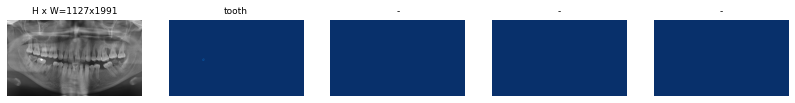

(1127, 1991, 163)


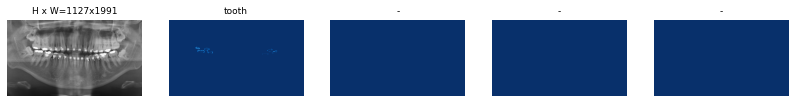

(1127, 1991, 19)


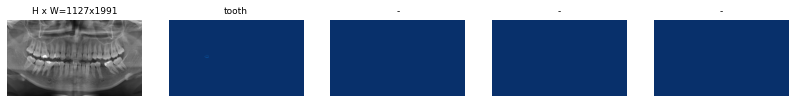

(1127, 1991, 51)


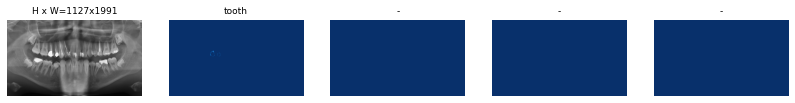

(1127, 1991, 108)


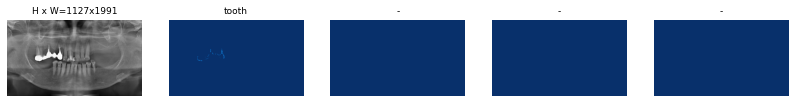

(1127, 1991, 282)


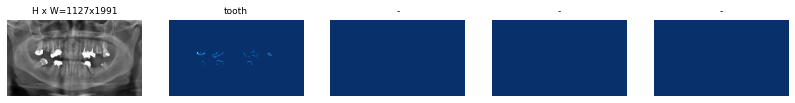

In [17]:
# Load and display random samples
image_ids = np.random.choice(teeth_dataset_train.image_ids, 6)
for image_id in image_ids:
    image = teeth_dataset_train.load_image(image_id)
    mask, class_ids = teeth_dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, teeth_dataset_train.class_names)

IndexError: ignored

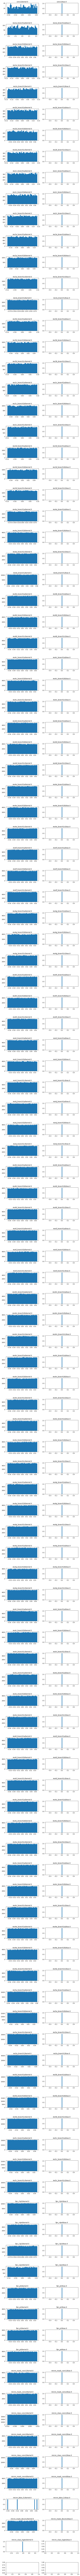

In [18]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)

##Training the model using the "Train" function

In [ ]:
model.train(teeth_dataset_train, teeth_dataset_eval, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=500, 
            layers="all")


Starting at epoch 0. LR=0.0001

Checkpoint Path: /content/drive/MyDrive/Masters Degree/Graduation Project/Code/teeth20210819T1528/mask_rcnn_teeth_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_br

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/tensorflow-1.15.2/python3.7/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


(1127, 1991, 62)
(1127, 1991, 62)
(1127, 1991, 62)
(1127, 1991, 62)
(1127, 1991, 43)
(1127, 1991, 43)
(1127, 1991, 43)
(1127, 1991, 43)
Epoch 1/500


/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


(1127, 1991, 224)
(1127, 1991, 224)
(1127, 1991, 224)
(1127, 1991, 224)
(1127, 1991, 0)
(1127, 1991, 0)
(1127, 1991, 0)
(1127, 1991, 0)
(1127, 1991, 169)
(1127, 1991, 169)
(1127, 1991, 169)
(1127, 1991, 169)
(1127, 1991, 66)
(1127, 1991, 66)
(1127, 1991, 66)
(1127, 1991, 66)
(1127, 1991, 115)
(1127, 1991, 115)
(1127, 1991, 115)
(1127, 1991, 115)
(1127, 1991, 80)
(1127, 1991, 80)
(1127, 1991, 80)
(1127, 1991, 80)
(1127, 1991, 270)
(1127, 1991, 270)
(1127, 1991, 270)
(1127, 1991, 270)
(1127, 1991, 84)
(1127, 1991, 84)
(1127, 1991, 84)
(1127, 1991, 84)
(1127, 1991, 184)
(1127, 1991, 184)
(1127, 1991, 184)
(1127, 1991, 184)
(1127, 1991, 1)
(1127, 1991, 1)
(1127, 1991, 0)
(1127, 1991, 0)
(1127, 1991, 1)
(1127, 1991, 1)
(1127, 1991, 0)
(1127, 1991, 0)
(1127, 1991, 40)
(1127, 1991, 40)
(1127, 1991, 40)
(1127, 1991, 40)
(1127, 1991, 34)
(1127, 1991, 34)
(1127, 1991, 34)
(1127, 1991, 34)
(1127, 1991, 0)
(1127, 1991, 0)
(1127, 1991, 0)
(1127, 1991, 0)
(1127, 1991, 14)
(1127, 1991, 14)
(1127, 199

##Examining the results and all masked individual teeth. 

In [ ]:
outputs = model.detect([original_image], verbose=1)

output = results[0]
visualize.display_instances(original_image, output['rois'], output['masks'], output['class_ids'], 
                            teeth_dataset_eval.class_names, output['scores'], ax=get_ax())